# Machine Learning based Multivariate Time Series Forecasting of ISO New England Electricity Demand

# Research Objectives

**RO1-  To conduct a thorough exploratory data analysis to learn more about the traits, trends, and connections found in the ME Zone electricity demand dataset.**

**RO2-To successfully explain the results and offer insightful context for the patterns of electricity demand, use narrative and visualisations.**

**RO3-To utilise the Random Forest, XGBoost, CatBoost, and Prophet algorithms to anticipate power consumption using multivariate time series forecasting approaches.**

**RO4-To use measures like RMSE (Root Mean Square Error), MAPE (Mean Absolute Percentage Error), R2 Score, MAE (Mean Absolute Error), and computational complexity analysis to assess and compare the performance of the suggested algorithms.**


# Implementations of Research Objectives

# RO1- Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('ME_zone.csv')

**1- Distribution of Demand**

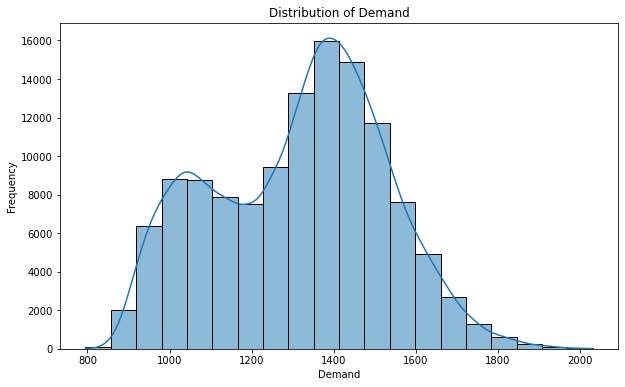

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='demand', bins=20, kde=True)
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.title('Distribution of Demand')
plt.savefig("1", dpi=600, bbox_inches="tight")

plt.show()


**2- Demand Variation by Hour**

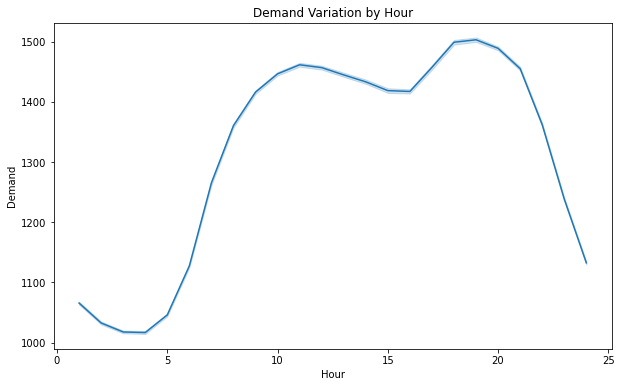

In [4]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='hour', y='demand')
plt.xlabel('Hour')
plt.ylabel('Demand')
plt.title('Demand Variation by Hour')
plt.savefig("2", dpi=600, bbox_inches="tight")

plt.show()


**3- Demand Distribution by Month**

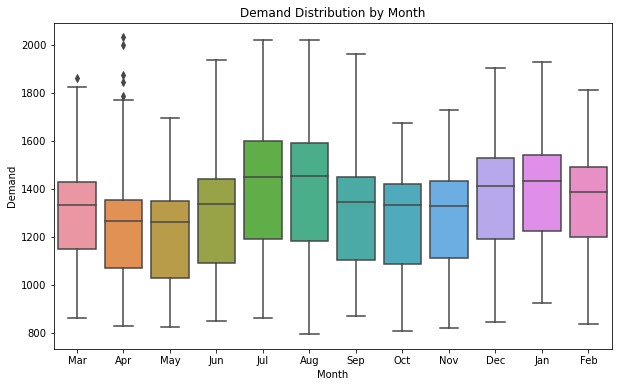

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='month', y='demand')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Demand Distribution by Month')
plt.savefig("3", dpi=600, bbox_inches="tight")

plt.show()


**4- Demand Vs. Temperature**

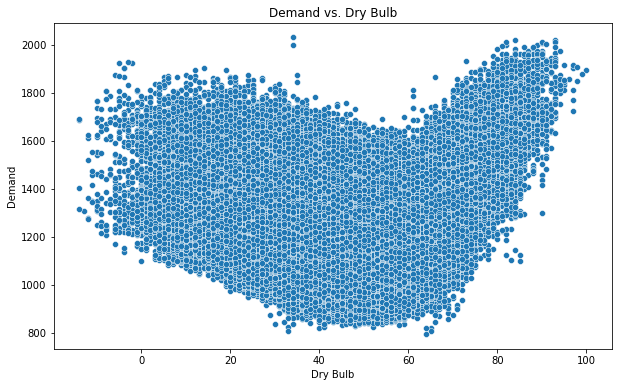

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='drybulb', y='demand')
plt.xlabel('Dry Bulb')
plt.ylabel('Demand')
plt.title('Demand vs. Dry Bulb')
plt.savefig("4", dpi=600, bbox_inches="tight")

plt.show()


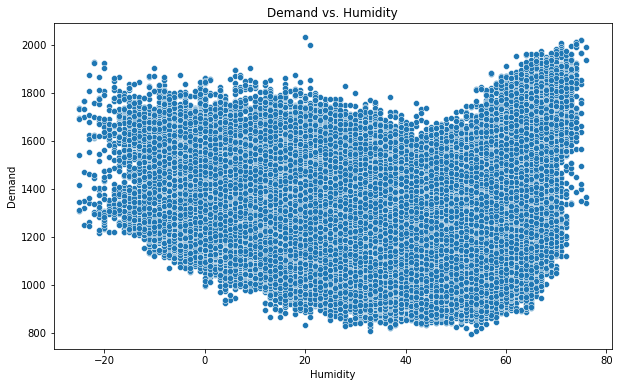

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dewpnt', y='demand')
plt.xlabel('Humidity')
plt.ylabel('Demand')
plt.title('Demand vs. Humidity')
plt.savefig("41", dpi=600, bbox_inches="tight")

plt.show()

**5- Demand Distribution by Day of Week**

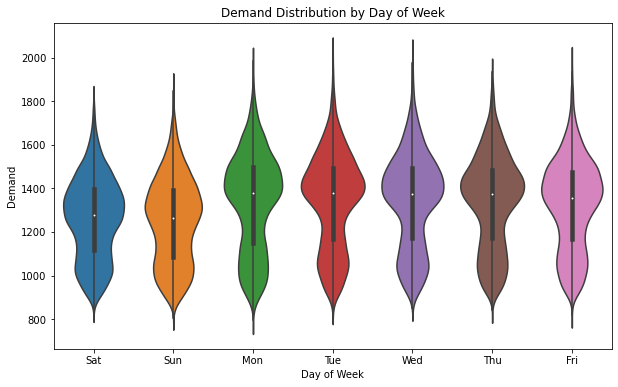

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='day_of_week', y='demand')
plt.xlabel('Day of Week')
plt.ylabel('Demand')
plt.title('Demand Distribution by Day of Week')
plt.savefig("5", dpi=600, bbox_inches="tight")

plt.show()


**6- Average Demand by Month**

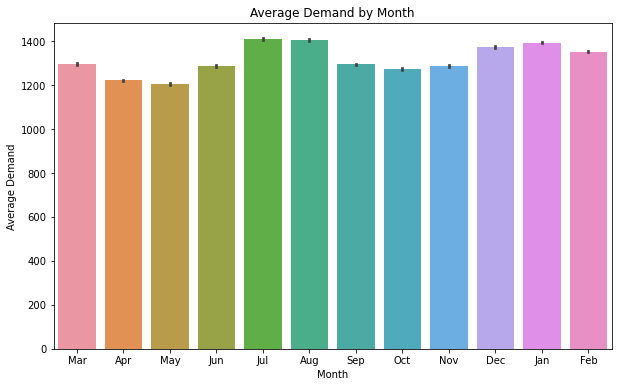

In [9]:
import numpy as np
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='month', y='demand', estimator=np.mean)
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.title('Average Demand by Month')
plt.savefig("6", dpi=600, bbox_inches="tight")

plt.show()


**9- Holiday count**

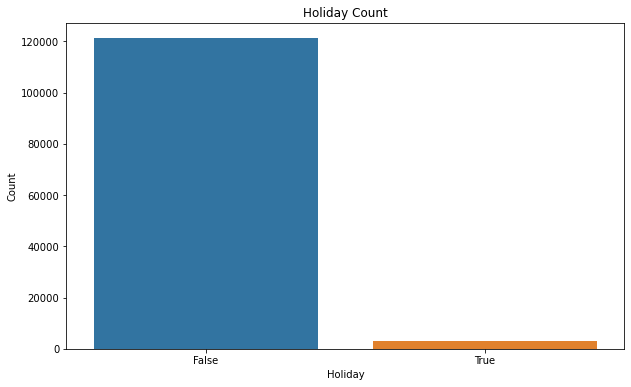

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.title('Holiday Count')
plt.savefig("9", dpi=600, bbox_inches="tight")

plt.show()


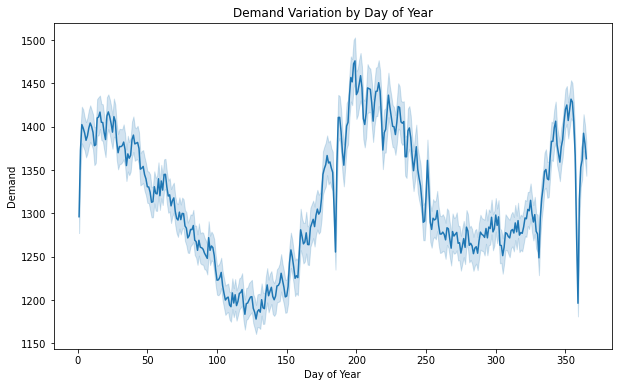

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='day_of_year', y='demand')
plt.xlabel('Day of Year')
plt.ylabel('Demand')
plt.title('Demand Variation by Day of Year')
plt.show()

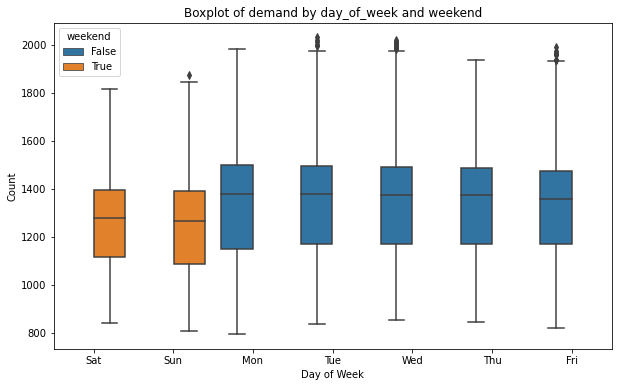

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='day_of_week', y='demand', hue='weekend')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Boxplot of demand by day_of_week and weekend')
plt.savefig("11", dpi=600, bbox_inches="tight")

plt.show()


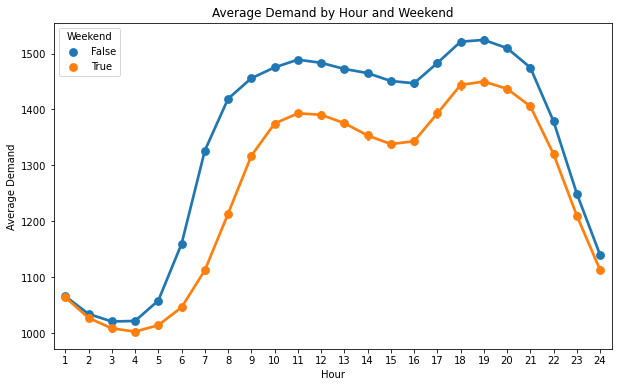

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='hour', y='demand', hue='weekend', estimator=np.mean)
plt.xlabel('Hour')
plt.ylabel('Average Demand')
plt.title('Average Demand by Hour and Weekend')
plt.legend(title='Weekend', loc='upper left')
plt.savefig("13", dpi=600, bbox_inches="tight")

plt.show()


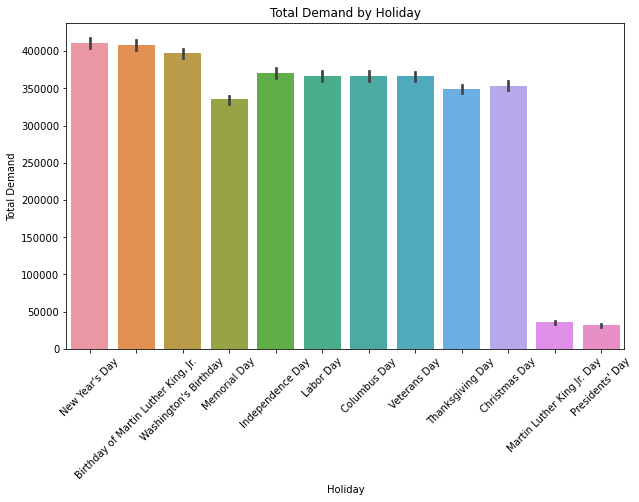

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='holiday_name', y='demand', estimator=np.sum)
plt.xlabel('Holiday')
plt.ylabel('Total Demand')
plt.title('Total Demand by Holiday')
plt.xticks(rotation=45)
plt.savefig("14", dpi=600, bbox_inches="tight")

plt.show()


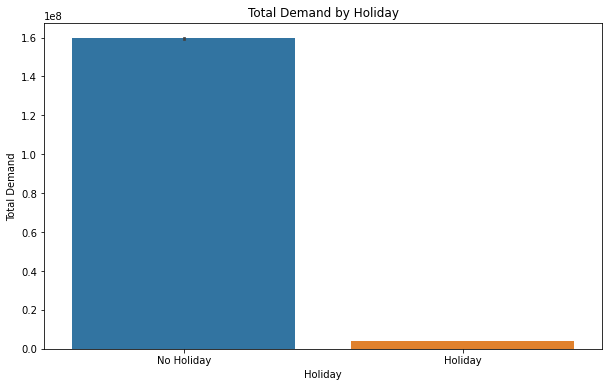

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='holiday', y='demand', estimator=np.sum)
plt.xlabel('Holiday')
plt.ylabel('Total Demand')
plt.title('Total Demand by Holiday')
plt.xticks([0, 1], ['No Holiday', 'Holiday'])
plt.savefig("15", dpi=600, bbox_inches="tight")

plt.show()


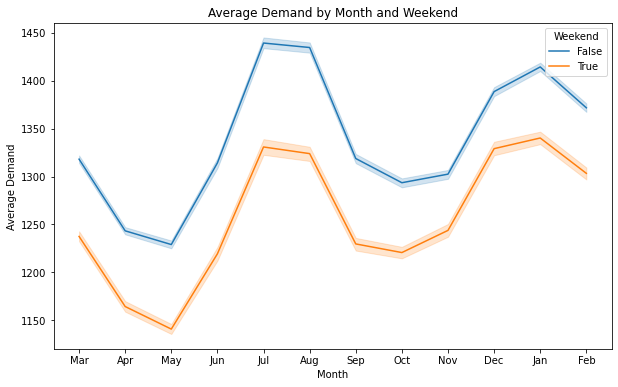

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='demand', hue='weekend', estimator=np.mean)
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.title('Average Demand by Month and Weekend')
plt.legend(title='Weekend', loc='upper right')
plt.savefig("16", dpi=600, bbox_inches="tight")

plt.show()


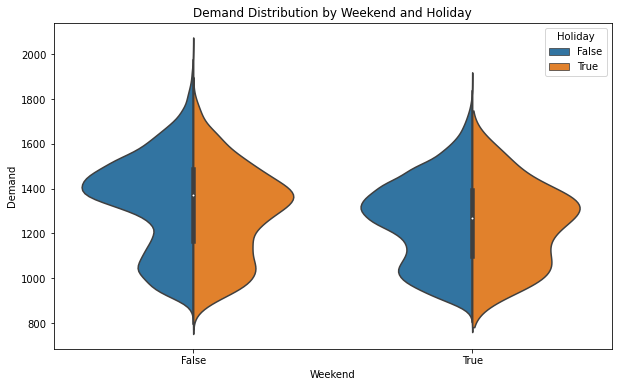

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='weekend', y='demand', hue='holiday', split=True)
plt.xlabel('Weekend')
plt.ylabel('Demand')
plt.title('Demand Distribution by Weekend and Holiday')
plt.legend(title='Holiday', loc='upper right')
plt.savefig("17", dpi=600, bbox_inches="tight")

plt.show()


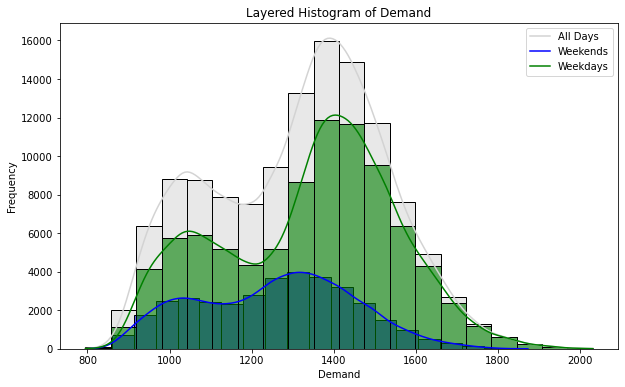

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plotting histogram for 'demand' on the background
sns.histplot(data=df, x='demand', bins=20, kde=True, color='lightgray')

# Plotting histogram for 'demand' on weekends in blue
sns.histplot(data=df[df['weekend']], x='demand', bins=20, kde=True, color='blue', alpha=0.6)

# Plotting histogram for 'demand' on weekdays in green
sns.histplot(data=df[~df['weekend']], x='demand', bins=20, kde=True, color='green', alpha=0.6)

plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.title('Layered Histogram of Demand')
plt.legend(labels=['All Days', 'Weekends', 'Weekdays'])
plt.savefig("20", dpi=600, bbox_inches="tight")

plt.show()


# RO3 and 4

# Implementation of Machine Learning Algorithm

1- Random Forest

2- CatBoost

3- XGBoost

4- Prophet 


**Stationarity Check**

In [19]:
from statsmodels.tsa.stattools import adfuller
ME_zone = pd.read_csv("ME_zone.csv")

# ADF test for 'demand' column
demand_adf = adfuller(ME_zone['demand'])
print("ADF test for 'demand' column:")
print(f"ADF Statistic: {demand_adf[0]:.4f}")
print(f"p-value: {demand_adf[1]:.4f}")
print("Critical Values:")
for key, value in demand_adf[4].items():
    print(f"   {key}: {value:.4f}")
    
# ADF test for 'drybulb' column
drybulb_adf = adfuller(ME_zone['drybulb'])
print("\nADF test for 'drybulb' column:")
print(f"ADF Statistic: {drybulb_adf[0]:.4f}")
print(f"p-value: {drybulb_adf[1]:.4f}")
print("Critical Values:")
for key, value in drybulb_adf[4].items():
    print(f"   {key}: {value:.4f}")
    
# ADF test for 'dewpnt' column
dewpnt_adf = adfuller(ME_zone['dewpnt'])
print("\nADF test for 'dewpnt' column:")
print(f"ADF Statistic: {dewpnt_adf[0]:.4f}")
print(f"p-value: {dewpnt_adf[1]:.4f}")
print("Critical Values:")
for key, value in dewpnt_adf[4].items():
    print(f"   {key}: {value:.4f}")



ADF test for 'demand' column:
ADF Statistic: -19.6346
p-value: 0.0000
Critical Values:
   1%: -3.4304
   5%: -2.8616
   10%: -2.5668

ADF test for 'drybulb' column:
ADF Statistic: -9.8057
p-value: 0.0000
Critical Values:
   1%: -3.4304
   5%: -2.8616
   10%: -2.5668

ADF test for 'dewpnt' column:
ADF Statistic: -11.6349
p-value: 0.0000
Critical Values:
   1%: -3.4304
   5%: -2.8616
   10%: -2.5668


# 1- Random Forest

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('ME_Zone.csv', index_col='date', parse_dates=True)
df = df[['demand', 'drybulb','dewpnt']]

# Create a lagged version of the demand variable to use as features for one time step.
df['demand_lagged'] = df['demand'].shift()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Split the training and testing sets into features and target variables
train_X, train_y = train[['demand_lagged', 'drybulb', 'dewpnt']], train['demand']
test_X, test_y = test[['demand_lagged', 'drybulb', 'dewpnt']], test['demand']

In [21]:
# Fit a Random Forest model to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)


In [22]:
train_X = train_X.fillna(1)

In [23]:
rf_model.fit(train_X, train_y)


RandomForestRegressor(random_state=0)

In [24]:
# Make predictions on the test data
predictions = rf_model.predict(test_X)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_y, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 4614.4722894141205


**Model Evaluation**

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_y, predictions)
print('Mean Squared Error:', mse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error
mae = mean_absolute_error(test_y, predictions)
print('Mean Absolute Error:', mae)

# Calculate the R2 score
r2 = r2_score(test_y, predictions)
print('R2 Score:', r2)

Mean Squared Error: 4614.4722894141205
Root Mean Squared Error: 67.92990717948994
Mean Absolute Error: 50.7716755544603
R2 Score: 0.8846715003328578


**Visualization(s)**

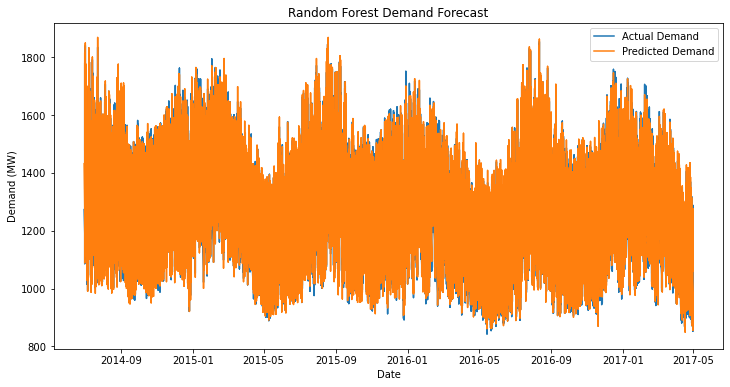

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Create a line plot of actual demand values vs predicted values
plt.plot(test.index, test_y, label='Actual Demand')
plt.plot(test.index, predictions, label='Predicted Demand')

plt.xlabel('Date')
plt.ylabel('Demand (MW)')
plt.title('Random Forest Demand Forecast')
plt.legend()
plt.show()


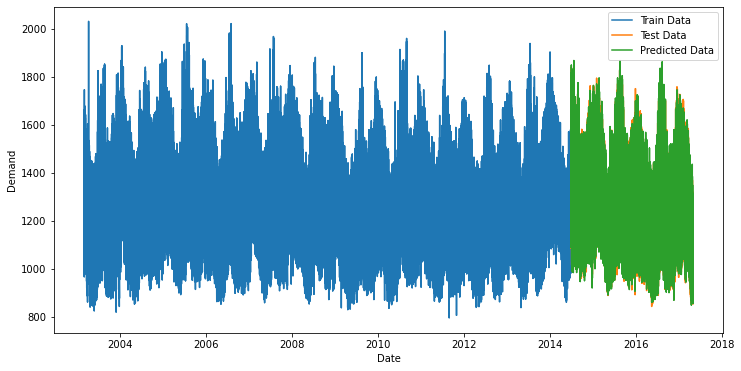

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot the actual values, training predictions, and testing predictions
plt.plot(train_y.index, train_y, label='Train Data')
plt.plot(test_y.index, test_y, label='Test Data')
plt.plot(test_y.index, predictions, label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# CATBOOST Algorithm

In [28]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split



In [29]:
# Load the data
df = pd.read_csv('ME_Zone.csv', index_col='date', parse_dates=True)
df = df[['demand', 'drybulb', 'dewpnt']]



In [30]:
# Create a lagged version of the demand variable to use as features
df['demand_lagged'] = df['demand'].shift()



In [31]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]



In [32]:
# Split the training and testing sets into features and target variables
train_X, train_y = train[['demand_lagged', 'drybulb', 'dewpnt']], train['demand']
test_X, test_y = test[['demand_lagged', 'drybulb', 'dewpnt']], test['demand']



In [33]:
# Fill missing values in the training and testing data
train_X = train_X.fillna(1)
test_X = test_X.fillna(1)



In [34]:
from catboost import CatBoostRegressor, Pool

# Convert the data into CatBoost's Pool format
train_pool = Pool(train_X, train_y)
test_pool = Pool(test_X, test_y)



In [35]:
# Define the CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=0)



In [36]:
# Fit the model to the training data
catboost_model.fit(train_pool)



0:	learn: 195.8206616	total: 165ms	remaining: 16.3s
1:	learn: 179.5313595	total: 176ms	remaining: 8.6s
2:	learn: 164.8868051	total: 192ms	remaining: 6.2s
3:	learn: 151.8755595	total: 204ms	remaining: 4.9s
4:	learn: 140.6519562	total: 216ms	remaining: 4.11s
5:	learn: 130.6561121	total: 227ms	remaining: 3.55s
6:	learn: 121.7836422	total: 239ms	remaining: 3.18s
7:	learn: 114.1004600	total: 250ms	remaining: 2.88s
8:	learn: 107.2030815	total: 263ms	remaining: 2.66s
9:	learn: 101.3038929	total: 272ms	remaining: 2.45s
10:	learn: 96.1464117	total: 283ms	remaining: 2.29s
11:	learn: 91.6626817	total: 293ms	remaining: 2.15s
12:	learn: 87.8842255	total: 302ms	remaining: 2.02s
13:	learn: 84.6361135	total: 311ms	remaining: 1.91s
14:	learn: 81.9205062	total: 319ms	remaining: 1.81s
15:	learn: 79.4511002	total: 329ms	remaining: 1.73s
16:	learn: 77.5091436	total: 337ms	remaining: 1.65s
17:	learn: 75.8331791	total: 349ms	remaining: 1.59s
18:	learn: 74.3858262	total: 357ms	remaining: 1.52s
19:	learn: 73.2

In [37]:
# Make predictions on the test data
predictions = catboost_model.predict(test_pool)



**Model Evaluation**

In [38]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_y, predictions)
print('Mean Squared Error:', mse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error
mae = mean_absolute_error(test_y, predictions)
print('Mean Absolute Error:', mae)

# Calculate the R2 score
r2 = r2_score(test_y, predictions)
print('R2 Score:', r2)


Mean Squared Error: 3658.157779410012
Root Mean Squared Error: 60.48270644911661
Mean Absolute Error: 45.898977756816656
R2 Score: 0.9085724603411571


**Visualization(s)**

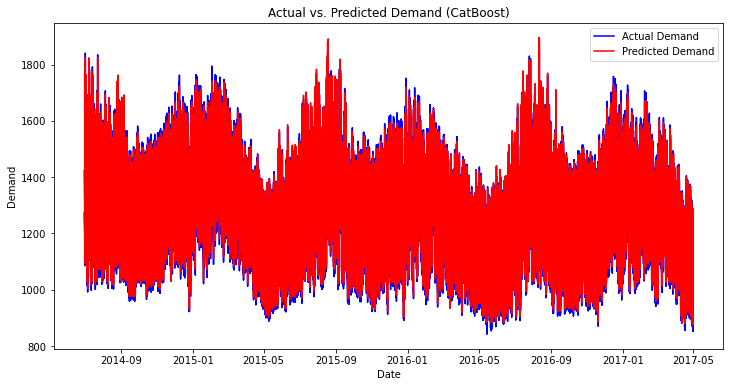

In [39]:
import matplotlib.pyplot as plt

# Plot the actual vs. predicted demand values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test_y, label='Actual Demand', color='blue')
plt.plot(test.index, predictions, label='Predicted Demand', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Actual vs. Predicted Demand (CatBoost)')
plt.legend()
plt.show()


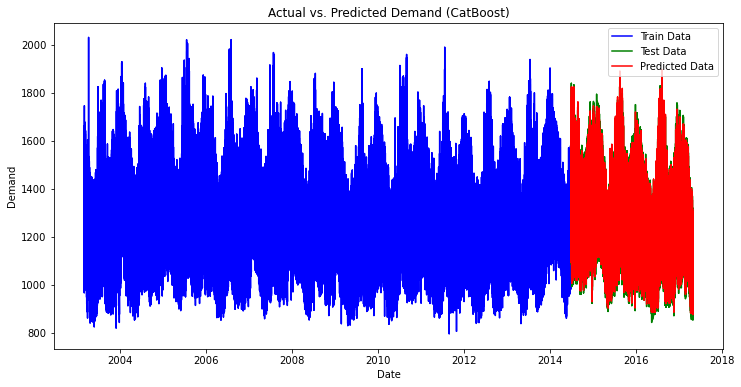

In [40]:
# Make predictions on the training and test sets
train_predictions = catboost_model.predict(train_pool)
test_predictions = catboost_model.predict(test_pool)

# Plot the actual values, training predictions, and testing predictions
plt.figure(figsize=(12, 6))
plt.plot(train_y.index, train_y, label='Train Data', color='blue')
plt.plot(test_y.index, test_y, label='Test Data', color='green')
plt.plot(test_y.index, test_predictions, label='Predicted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.title('Actual vs. Predicted Demand (CatBoost)')
plt.show()

# 03- XGBoost

In [41]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt




In [42]:
# Load the data
df = pd.read_csv('ME_Zone.csv', index_col='date', parse_dates=True)
df = df[['demand', 'drybulb', 'dewpnt']]



In [43]:
# Create a lagged version of the demand variable to use as features
df['demand_lagged'] = df['demand'].shift()



In [44]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]



In [45]:
# Split the training and testing sets into features and target variables
train_X, train_y = train[['demand_lagged', 'drybulb', 'dewpnt']], train['demand']
test_X, test_y = test[['demand_lagged', 'drybulb', 'dewpnt']], test['demand']



In [46]:
# Fill missing values with 1 (alternatively, you can use other methods to handle missing values)
train_X = train_X.fillna(1)
test_X = test_X.fillna(1)



In [47]:
# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
xgb_model.fit(train_X, train_y)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [48]:
# Make predictions on the test data
predictions = xgb_model.predict(test_X)

# Calculate the evaluation metrics
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, predictions)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R-squared (R2):', r2)

Mean Squared Error: 3633.994359998591
Mean Absolute Error: 45.5339569757273
Root Mean Squared Error: 60.28262071276091
R-squared (R2): 0.9091763714132726


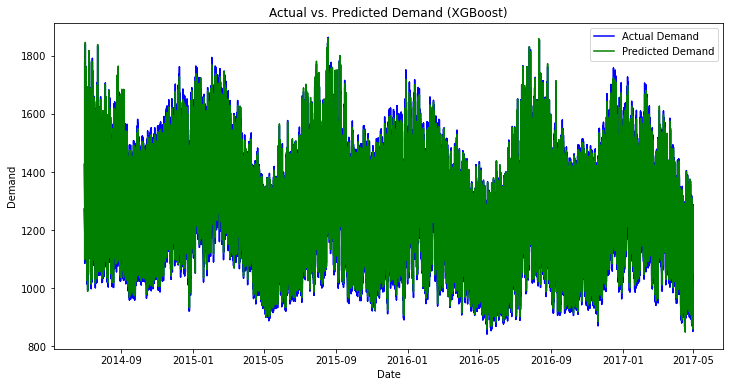

In [49]:
# Plot the actual values and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y, label='Actual Demand', color='blue')
plt.plot(test_y.index, predictions, label='Predicted Demand', color='green')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Actual vs. Predicted Demand (XGBoost)')
plt.legend()
plt.show()

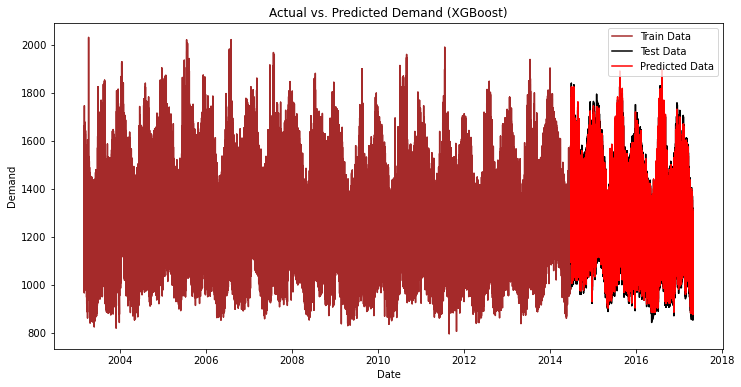

In [50]:
# Plot the actual values, training predictions, and testing predictions
plt.figure(figsize=(12, 6))
plt.plot(train_y.index, train_y, label='Train Data', color='brown')
plt.plot(test_y.index, test_y, label='Test Data', color='black')
plt.plot(test_y.index, test_predictions, label='Predicted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.title('Actual vs. Predicted Demand (XGBoost)')
plt.show()

# 04- Prophet Algorithm

13:29:00 - cmdstanpy - INFO - Chain [1] start processing
13:31:13 - cmdstanpy - INFO - Chain [1] done processing


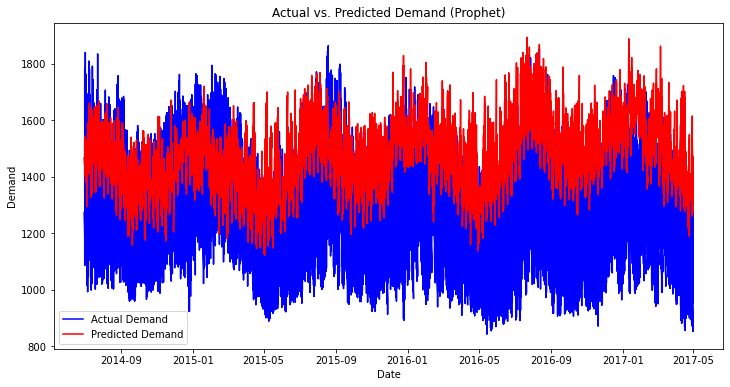

In [51]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('ME_Zone.csv', index_col='date', parse_dates=True)
df = df[['demand', 'drybulb', 'dewpnt']]

# Create a lagged version of the demand variable to use as features
df['demand_lagged'] = df['demand'].shift()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fill missing values with 1 (alternatively, you can use other methods to handle missing values)
train = train.fillna(1)
test = test.fillna(1)
# Prepare the DataFrame for Prophet
train_prophet = train.reset_index()
train_prophet.rename(columns={'date': 'ds', 'demand': 'y'}, inplace=True)

# Train the Prophet model
prophet_model = Prophet()
prophet_model.add_regressor('drybulb')
prophet_model.add_regressor('dewpnt')
prophet_model.fit(train_prophet)

# Make future predictions for the test set
test_prophet = test.reset_index()
test_prophet.rename(columns={'date': 'ds', 'demand': 'y'}, inplace=True)
test_prophet['drybulb'] = test['drybulb'].values
test_prophet['dewpnt'] = test['dewpnt'].values

forecast = prophet_model.predict(test_prophet)

# Extracting the actual and predicted values
actual_values = test['demand'].values
predicted_values = forecast['yhat'].values

# Plot the actual values and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, actual_values, label='Actual Demand', color='blue')
plt.plot(test.index, predicted_values, label='Predicted Demand', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Actual vs. Predicted Demand (Prophet)')
plt.legend()
plt.show()


In [53]:
# Calculate the evaluation metrics
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared (R2):', r2)
print('Root Mean Squared Error:', rmse)


Mean Squared Error: 3633.994359998591
Mean Absolute Error: 45.5339569757273
R-squared (R2): 0.9091763714132726
Root Mean Squared Error: 60.28262071276091


# Computational Complexity Analysis

13:33:54 - cmdstanpy - INFO - Chain [1] start processing
13:35:04 - cmdstanpy - INFO - Chain [1] done processing


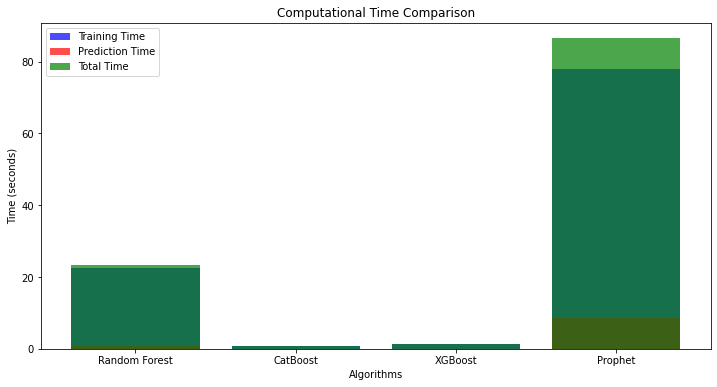

Random Forest - Training Time: 22.4539 seconds
Random Forest - Prediction Time: 0.8238 seconds
Random Forest - Total Time: 23.2777 seconds

CatBoost - Training Time: 0.8170 seconds
CatBoost - Prediction Time: 0.0040 seconds
CatBoost - Total Time: 0.8210 seconds

XGBoost - Training Time: 1.3554 seconds
XGBoost - Prediction Time: 0.0160 seconds
XGBoost - Total Time: 1.3713 seconds

Prophet - Training Time: 77.9602 seconds
Prophet - Prediction Time: 8.5414 seconds
Prophet - Total Time: 86.5016 seconds



In [56]:
# Store the algorithm names
import time
algorithm_names = ['Random Forest', 'CatBoost', 'XGBoost', 'Prophet']

# Initialize lists to store training, prediction, and total times
training_times = []
prediction_times = []
total_times = []

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
start_time = time.time()
rf_model.fit(train_X, train_y)
training_time_rf = time.time() - start_time

start_time = time.time()
rf_predictions = rf_model.predict(test_X)
prediction_time_rf = time.time() - start_time

# CatBoost
catboost_model = CatBoostRegressor(n_estimators=100, random_state=0, verbose=0)
start_time = time.time()
catboost_model.fit(train_X, train_y)
training_time_catboost = time.time() - start_time

start_time = time.time()
catboost_predictions = catboost_model.predict(test_X)
prediction_time_catboost = time.time() - start_time

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
start_time = time.time()
xgb_model.fit(train_X, train_y)
training_time_xgb = time.time() - start_time

start_time = time.time()
xgb_predictions = xgb_model.predict(test_X)
prediction_time_xgb = time.time() - start_time

# Prophet
train_prophet = train[['demand']].reset_index()
train_prophet.rename(columns={'date': 'ds', 'demand': 'y'}, inplace=True)

prophet_model = Prophet()
start_time = time.time()
prophet_model.fit(train_prophet)
training_time_prophet = time.time() - start_time

test_prophet = test[['demand']].reset_index()
test_prophet.rename(columns={'date': 'ds', 'demand': 'y'}, inplace=True)
test_prophet['drybulb'] = test['drybulb'].values
test_prophet['dewpnt'] = test['dewpnt'].values

start_time = time.time()
forecast = prophet_model.predict(test_prophet)
prophet_predictions = forecast['yhat'].values
prediction_time_prophet = time.time() - start_time

# Calculate total times
total_time_rf = training_time_rf + prediction_time_rf
total_time_catboost = training_time_catboost + prediction_time_catboost
total_time_xgb = training_time_xgb + prediction_time_xgb
total_time_prophet = training_time_prophet + prediction_time_prophet

# Store times in lists
training_times = [training_time_rf, training_time_catboost, training_time_xgb, training_time_prophet]
prediction_times = [prediction_time_rf, prediction_time_catboost, prediction_time_xgb, prediction_time_prophet]
total_times = [total_time_rf, total_time_catboost, total_time_xgb, total_time_prophet]

# Create a bar plot to visualize the training, prediction, and total times
plt.figure(figsize=(12, 6))
plt.bar(algorithm_names, training_times, label='Training Time', color='blue', alpha=0.7)
plt.bar(algorithm_names, prediction_times, label='Prediction Time', color='red', alpha=0.7)
plt.bar(algorithm_names, total_times, label='Total Time', color='green', alpha=0.7)
plt.xlabel('Algorithms')
plt.ylabel('Time (seconds)')
plt.title('Computational Time Comparison')
plt.legend()
plt.show()

# Print the values
for i, algorithm in enumerate(algorithm_names):
    print(f'{algorithm} - Training Time: {training_times[i]:.4f} seconds')
    print(f'{algorithm} - Prediction Time: {prediction_times[i]:.4f} seconds')
    print(f'{algorithm} - Total Time: {total_times[i]:.4f} seconds')
    print()
